Vadel NLP sentiment analysis
References
#


In [1]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
obj = SentimentIntensityAnalyzer();


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 15.2 MB/s 


import the main file 

In [2]:
import pandas as pd

dfbit = pd.read_csv('/content/smallData.csv')  # ,  dtype={'text': 'str', 'date': 'int'})#,sep='\t')
#dfbit= pd.read_csv('/Users/rohanparekh/UEL/UEL Research/btc_refined.csv') #for macos its different
low_memory = False

checking if the file is running 

In [3]:
dfbit.head()

,Domain,category
0,andyburd.com,1
1,musicals.com,10
2,cultura.com,10
3,ifly.com,10
4,mirror.com,10


In [4]:
dfbit

,Domain,category
0,andyburd.com,1
1,musicals.com,10
2,cultura.com,10
3,ifly.com,10
4,mirror.com,10
...,...,...
123,freecellphone.com,10
124,drumsets.com,10
125,golfresorts.com,10
126,onlinepokerroom.com,10


In [ ]:
# removing NA values from data frame
#dfbit.dropna(inplace=True)

In [6]:
sentiment_dict = obj.polarity_scores(dfbit.iloc[0]['Domain'])
#print(sentiment_dict)
sentiment_dict

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [10]:
dfbit['scores'] = dfbit['Domain'].apply(lambda review:obj.polarity_scores(review)) #avg time 4 mins
#dfbit['compound'] = dfbit['scores'].apply(lambda score_dict: score_dict['compound'])

dfbit['sentiment_type']=''
dfbit.loc[dfbit.compound>0,'sentiment_type']=1
dfbit.loc[dfbit.compound==0,'sentiment_type']=0
dfbit.loc[dfbit.compound<0,'sentiment_type']=-1

dfbit.head()

,Domain,category,scores,compound,sentiment_type
0,andyburd.com,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0
1,musicals.com,10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0
2,cultura.com,10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0
3,ifly.com,10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0
4,mirror.com,10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0


In [13]:
dfbit

new_df = dfbit[['Domain', 'sentiment_type', 'category']]

new_df

,Domain,sentiment_type,category
0,andyburd.com,0,1
1,musicals.com,0,10
2,cultura.com,0,10
3,ifly.com,0,10
4,mirror.com,0,10
...,...,...,...
123,freecellphone.com,0,10
124,drumsets.com,0,10
125,golfresorts.com,0,10
126,onlinepokerroom.com,0,10


Calculate daily average from hourly data

In [18]:
new_df.to_csv('/content/domainsentiments_small.csv')

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


//Code Dump

In [ ]:
#mount to the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.5 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.1/898.1 KB 3.5 MB/s eta 0:00:0000:0100:01
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Confi

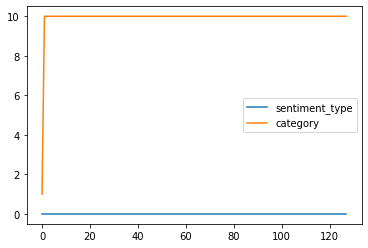

In [19]:
import matplotlib.pyplot as plt
new_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f506641ac90>]],
      dtype=object)

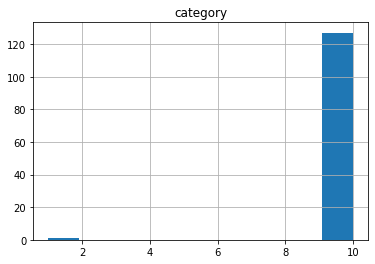

In [22]:
new_df.hist()

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Domain          128 non-null    object
 1   sentiment_type  128 non-null    object
 2   category        128 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


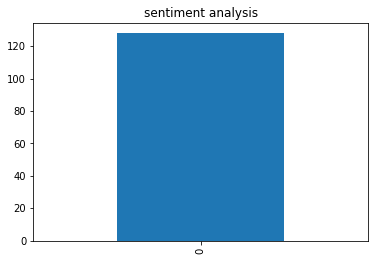

In [24]:
new_df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

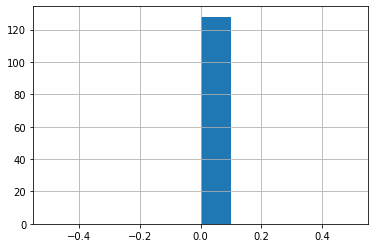

In [29]:
new_df.sentiment_type.hist() #same as above